In [1]:
import os
import requests
import zipfile
import pandas as pd

def download_file(url, output_path):
    """Download file from a URL if it does not exist."""
    if not os.path.exists(output_path):
        print(f"Downloading from {url} ...")
        response = requests.get(url, stream=True)
        response.raise_for_status()
        with open(output_path, "wb") as f:
            for chunk in response.iter_content(chunk_size=8192):
                if chunk:
                    f.write(chunk)
        print(f"Downloaded file to {output_path}.")
    else:
        print(f"File already exists: {output_path}")

def extract_zip(zip_path, extract_to):
    """Extract zip file."""
    if not os.path.exists(extract_to):
        os.makedirs(extract_to, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted {zip_path} to {extract_to}.")

def find_file_in_directory(directory, filename):
    """Search recursively for filename in directory."""
    for root, dirs, files in os.walk(directory):
        if filename in files:
            return os.path.join(root, filename)
    return None

# --- MovieLens 1M Dataset ---
movielens_url = "https://files.grouplens.org/datasets/movielens/ml-1m.zip"
movielens_zip_path = "ml-1m.zip"
movielens_extract_dir = "ml-1m"

download_file(movielens_url, movielens_zip_path)
extract_zip(movielens_zip_path, movielens_extract_dir)

ratings_path = find_file_in_directory(movielens_extract_dir, "ratings.dat")
movies_path = find_file_in_directory(movielens_extract_dir, "movies.dat")

if ratings_path is None or movies_path is None:
    raise FileNotFoundError("Could not find ratings.dat or movies.dat")

# Read MovieLens data; ratings use "::" as delimiter.
ratings = pd.read_csv(ratings_path, sep="::", engine='python',
                      names=["UserID", "MovieID", "Rating", "Timestamp"])
# The movies file is latin-1 encoded.
movies = pd.read_csv(movies_path, sep="::", engine='python',
                     names=["MovieID", "Title", "Genres"], encoding='latin-1')

print("=== MovieLens Ratings ===")
print(ratings.head())
print("\n=== MovieLens Movies ===")
print(movies.head())
print("\n=== Ratings Summary ===")
print(ratings.describe())

# --- MIND Dataset ---
# For MIND, downloaded the MIND-small dataset from Kaggle manually:
# Placed the downloaded file (e.g., 'MINDsmall.zip') into your working directory.

mind_zip_path = "MINDsmall_train.zip"
mind_extract_dir = "MINDsmall"

if os.path.exists(mind_zip_path):
    extract_zip(mind_zip_path, mind_extract_dir)
else:
    print("MINDsmall.zip not found. Please download it from Kaggle and place it in the working directory.")

# For MIND, the files are:
behaviors_path = os.path.join(mind_extract_dir, "behaviors.tsv")
news_path = os.path.join(mind_extract_dir, "news.tsv")

if not os.path.exists(behaviors_path):
    behaviors_path = find_file_in_directory(mind_extract_dir, "behaviors.tsv")
if not os.path.exists(news_path):
    news_path = find_file_in_directory(mind_extract_dir, "news.tsv")

if behaviors_path is None or news_path is None:
    raise FileNotFoundError("Could not locate behaviors.tsv or news.tsv in MIND dataset.")

behaviors = pd.read_csv(behaviors_path, sep="\t")
news = pd.read_csv(news_path, sep="\t", header=None,
                   names=['news_id', 'category', 'subcategory', 'title', 'abstract', 'url', 'title_entities', 'abstract_entities'])


print("\n=== MIND Behaviors ===")
print(behaviors.head())
print("\n=== MIND News ===")
print(news.head())
print("\n=== News Data Summary ===")
print(news.describe(include='all'))


Downloaded file to ml-1m.zip.
Extracted ml-1m.zip to ml-1m.
=== MovieLens Ratings ===
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

=== MovieLens Movies ===
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

=== Ratings Summary ===
             UserID       MovieID        Rating     Timestamp
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00  

MovieLens Ratings Head:
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

MovieLens Movies Head:
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

Ratings Summary:
             UserID       MovieID        Rating     Timestamp
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00  9.722437e+08
std    1.728413e+03  1.096041e+03  1.117102e+00  1.215256e

<ipython-input-2-90e05cdea255>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating", data=ratings, palette="viridis")


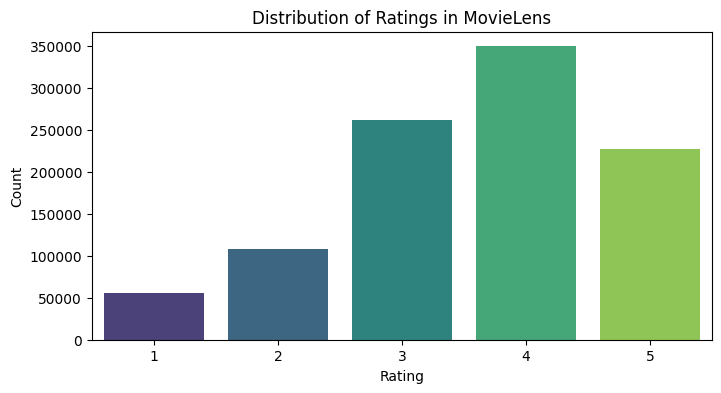

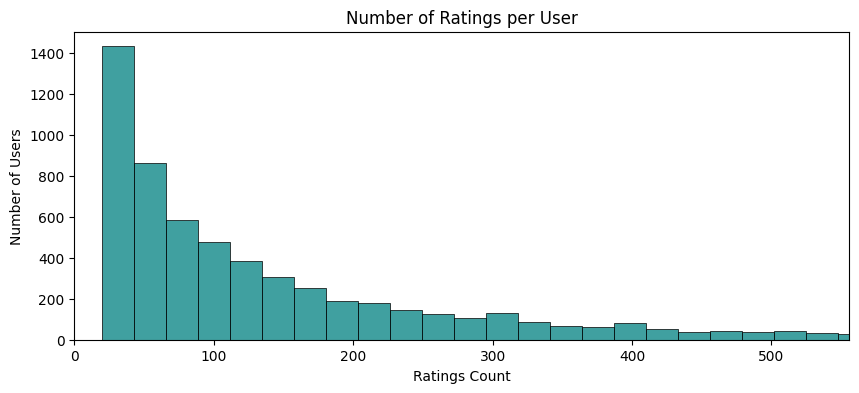

<ipython-input-2-90e05cdea255>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="coolwarm")


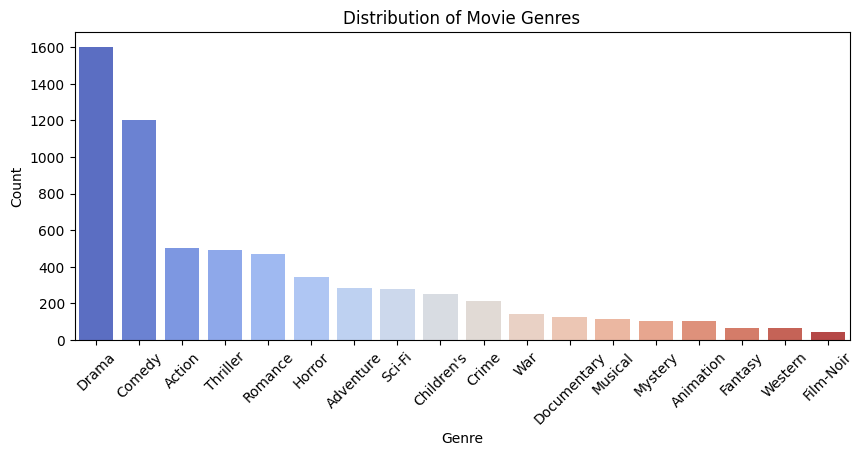

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ====================
# EDA for MovieLens
# ====================

# Check the first few rows of ratings and movies
print("MovieLens Ratings Head:")
print(ratings.head())
print("\nMovieLens Movies Head:")
print(movies.head())

# Summary statistics for ratings
print("\nRatings Summary:")
print(ratings.describe())

# Distribution of ratings
plt.figure(figsize=(8, 4))
sns.countplot(x="Rating", data=ratings, palette="viridis")
plt.title("Distribution of Ratings in MovieLens")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Number of ratings per user
ratings_per_user = ratings.groupby("UserID").size()
plt.figure(figsize=(10, 4))
sns.histplot(ratings_per_user, bins=100, kde=False, color="teal")
plt.title("Number of Ratings per User")
plt.xlabel("Ratings Count")
plt.ylabel("Number of Users")
plt.xlim(0, np.percentile(ratings_per_user, 95))  # focus on the 95th percentile
plt.show()

# Check distribution of movies per genre:
# Since movies can have multiple genres separated by '|', split and count.
genre_list = movies['Genres'].str.split('|').explode()
genre_counts = genre_list.value_counts()

plt.figure(figsize=(10, 4))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="coolwarm")
plt.title("Distribution of Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


MIND Behaviors Head:
   1  U13740  11/11/2019 9:05:58 AM  \
0  2  U91836  11/12/2019 6:11:30 PM   
1  3  U73700  11/14/2019 7:01:48 AM   
2  4  U34670  11/11/2019 5:28:05 AM   
3  5   U8125  11/12/2019 4:11:21 PM   
4  6  U19739  11/11/2019 6:52:13 PM   

  N55189 N42782 N34694 N45794 N18445 N63302 N10414 N19347 N31801  \
0  N31739 N6072 N63045 N23979 N35656 N43353 N8129...               
1  N10732 N25792 N7563 N21087 N41087 N5445 N60384...               
2  N45729 N2203 N871 N53880 N41375 N43142 N33013 ...               
3                        N10078 N56514 N14904 N33740               
4  N39074 N14343 N32607 N32320 N22007 N442 N19001...               

                                   N55689-1 N35729-0  
0  N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...  
1  N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...  
2                N35729-0 N33632-0 N49685-1 N27581-0  
3  N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...  
4        N21119-1 N53696-0 N33619-1 N25722-0 N2869-0  
Inde

<ipython-input-3-7fdc21253145>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="mako")


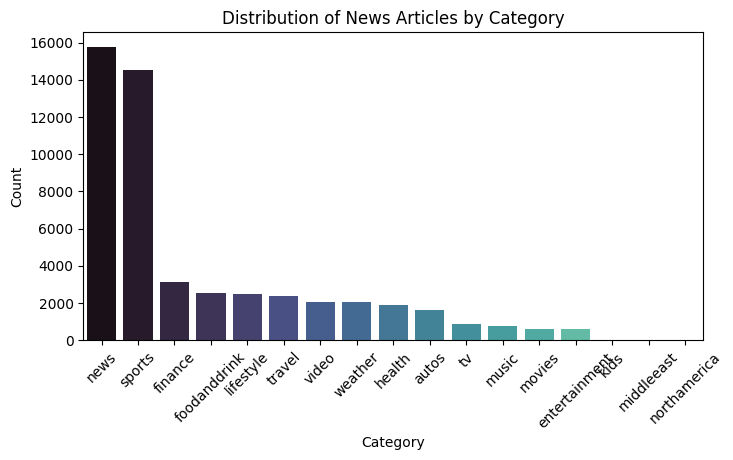

In [3]:
# ====================
# EDA for MIND Dataset
# ====================

# Display head of behaviors and news DataFrames
print("\nMIND Behaviors Head:")
print(behaviors.head())
print(behaviors.columns)
print("\nMIND News Head:")
print(news.head())
print(news.columns)

# Check basic info and summary for news articles
print("\nNews Data Info:")
print(news.info())
print("\nNews Data Summary (for categorical columns):")
print(news.describe(include='object'))

# Distribution of news articles by category
if 'category' in news.columns:
    category_counts = news['category'].value_counts()
    plt.figure(figsize=(8, 4))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette="mako")
    plt.title("Distribution of News Articles by Category")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Optional: Visualize temporal distribution of impressions (if 'time' column is available)
if 'time' in behaviors.columns:
    # Convert time to datetime
    behaviors['time'] = pd.to_datetime(behaviors['time'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
    behaviors.dropna(subset=['time'], inplace=True)
    plt.figure(figsize=(10, 4))
    sns.histplot(behaviors['time'], bins=50, color="green")
    plt.title("Distribution of Impression Times (MIND)")
    plt.xlabel("Time")
    plt.ylabel("Count")
    plt.show()


News DataFrame Columns:
['news_id', 'category', 'subcategory', 'title', 'abstract', 'url', 'title_entities', 'abstract_entities']

News DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51282 entries, 0 to 51281
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   news_id            51282 non-null  object
 1   category           51282 non-null  object
 2   subcategory        51282 non-null  object
 3   title              51282 non-null  object
 4   abstract           48616 non-null  object
 5   url                51282 non-null  object
 6   title_entities     51279 non-null  object
 7   abstract_entities  51278 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB
None

Missing values in News DataFrame:
news_id                 0
category                0
subcategory             0
title                   0
abstract             2666
title_entities          3
abstract_entities       4
dtype: i

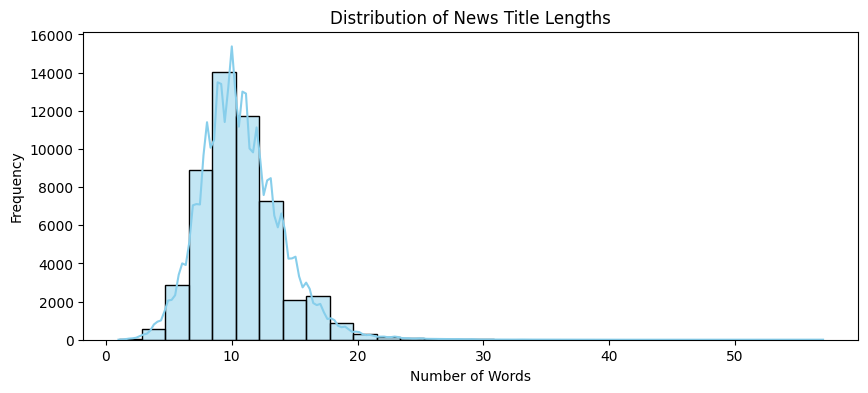

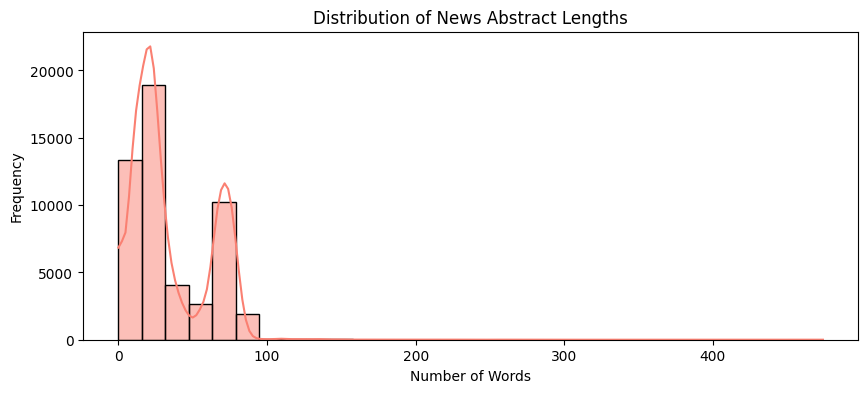


Title Entities Count Statistics:
count    51282.000000
mean         1.136442
std          0.978128
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: title_entity_count, dtype: float64

Abstract Entities Count Statistics:
count    51282.000000
mean         1.749951
std          1.800618
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         30.000000
Name: abstract_entity_count, dtype: float64


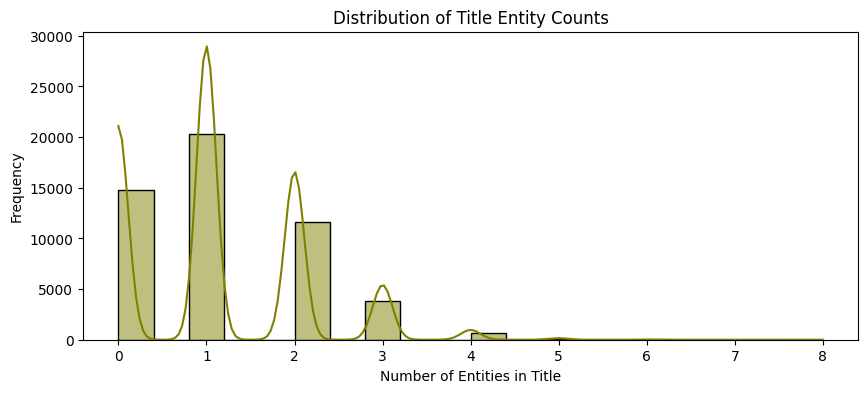

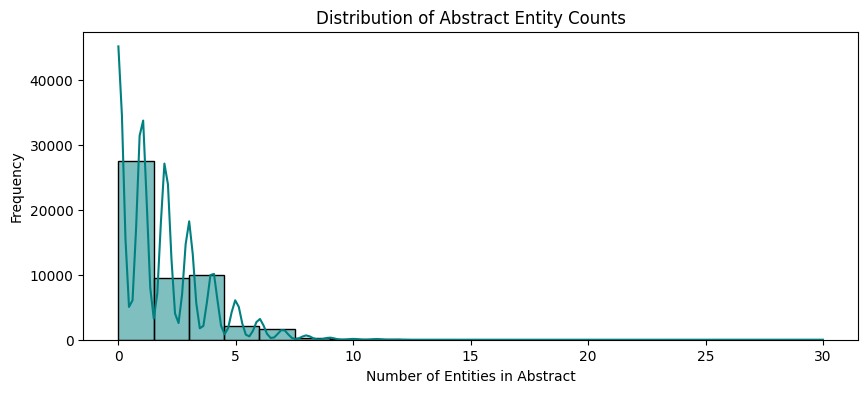


Example parsed title entities (first 5 rows):
  news_id                              parsed_title_entities
0  N55528  [{'Label': 'Prince Philip, Duke of Edinburgh',...
1  N19639  [{'Label': 'Adipose tissue', 'Type': 'C', 'Wik...
2  N61837                                                 []
3  N53526                                                 []
4  N38324  [{'Label': 'Skin tag', 'Type': 'C', 'WikidataI...

Example parsed abstract entities (first 5 rows):
  news_id                           parsed_abstract_entities
0  N55528                                                 []
1  N19639  [{'Label': 'Adipose tissue', 'Type': 'C', 'Wik...
2  N61837  [{'Label': 'Ukraine', 'Type': 'G', 'WikidataId...
3  N53526  [{'Label': 'National Basketball Association', ...
4  N38324                                                 []


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Display columns and basic info
print("News DataFrame Columns:")
print(news.columns.tolist())
print("\nNews DataFrame Info:")
print(news.info())

# Check for missing values in key columns
print("\nMissing values in News DataFrame:")
print(news[['news_id', 'category', 'subcategory', 'title', 'abstract', 'title_entities', 'abstract_entities']].isna().sum())

# Unique values in 'category' and their counts
print("\nUnique News Categories:")
print(news['category'].unique())
print("\nNews Category Counts:")
print(news['category'].value_counts())

# Unique values in 'subcategory' and their counts
print("\nUnique News Subcategories:")
print(news['subcategory'].unique())
print("\nNews Subcategory Counts:")
print(news['subcategory'].value_counts())

# Analyze textual content lengths
news['title_length'] = news['title'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)
news['abstract_length'] = news['abstract'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

print("\nTitle Length Statistics:")
print(news['title_length'].describe())
print("\nAbstract Length Statistics:")
print(news['abstract_length'].describe())

# Plot distributions of title and abstract lengths
plt.figure(figsize=(10, 4))
sns.histplot(news['title_length'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of News Title Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(news['abstract_length'], bins=30, kde=True, color="salmon")
plt.title("Distribution of News Abstract Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Parse the entity columns (which are stored as JSON-like strings)
def parse_entities(entity_str):
    try:
        # Replace single quotes with double quotes to convert to valid JSON, if necessary
        return json.loads(entity_str.replace("'", "\""))
    except Exception as e:
        return []

# Apply parsing functions to entity columns
news['parsed_title_entities'] = news['title_entities'].apply(lambda x: parse_entities(x) if pd.notnull(x) else [])
news['parsed_abstract_entities'] = news['abstract_entities'].apply(lambda x: parse_entities(x) if pd.notnull(x) else [])

# Compute number of entities in title and abstract
news['title_entity_count'] = news['parsed_title_entities'].apply(len)
news['abstract_entity_count'] = news['parsed_abstract_entities'].apply(len)

print("\nTitle Entities Count Statistics:")
print(news['title_entity_count'].describe())
print("\nAbstract Entities Count Statistics:")
print(news['abstract_entity_count'].describe())

# Plot the distribution of entity counts
plt.figure(figsize=(10, 4))
sns.histplot(news['title_entity_count'], bins=20, kde=True, color="olive")
plt.title("Distribution of Title Entity Counts")
plt.xlabel("Number of Entities in Title")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(news['abstract_entity_count'], bins=20, kde=True, color="teal")
plt.title("Distribution of Abstract Entity Counts")
plt.xlabel("Number of Entities in Abstract")
plt.ylabel("Frequency")
plt.show()

# Optionally, show examples of parsed entities
print("\nExample parsed title entities (first 5 rows):")
print(news[['news_id', 'parsed_title_entities']].head())
print("\nExample parsed abstract entities (first 5 rows):")
print(news[['news_id', 'parsed_abstract_entities']].head())


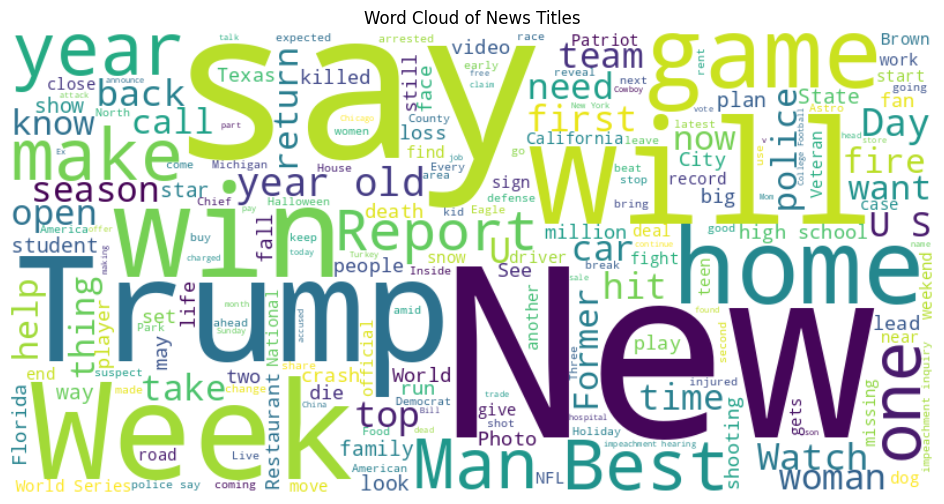

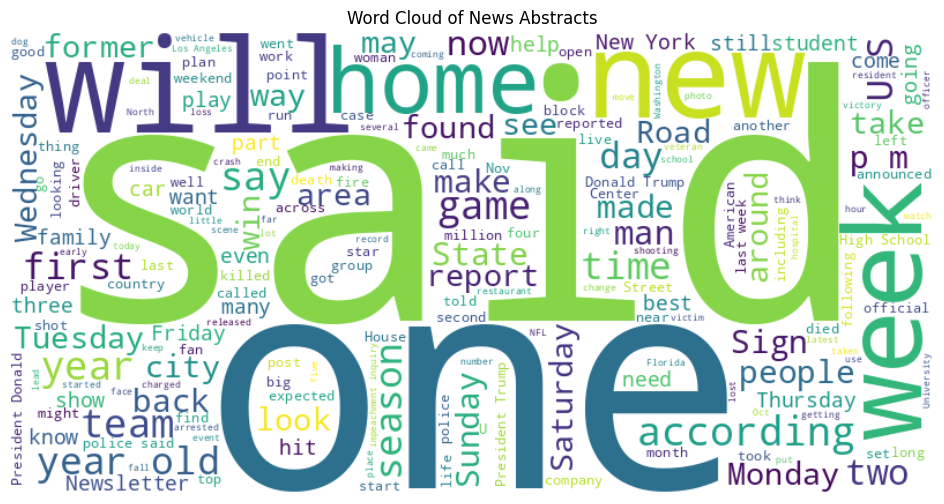

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for news titles
titles_text = " ".join(news['title'].dropna().tolist())
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

plt.figure(figsize=(12, 6))
plt.imshow(title_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of News Titles")
plt.show()

# Generate a word cloud for news abstracts
abstracts_text = " ".join(news['abstract'].dropna().tolist())
abstract_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(abstracts_text)

plt.figure(figsize=(12, 6))
plt.imshow(abstract_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of News Abstracts")
plt.show()


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the abstracts (using only abstracts with enough text)
abstracts = news['abstract'].dropna()
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(abstracts)

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

display_topics(lda, vectorizer.get_feature_names_out(), 10)


Topic 1:
police said county man year old school according morning near

Topic 2:
new york best home make like post food need just

Topic 3:
president trump house state impeachment donald said world new white

Topic 4:
said city years year people day weather million time family

Topic 5:
game season team week night sunday football win coach time



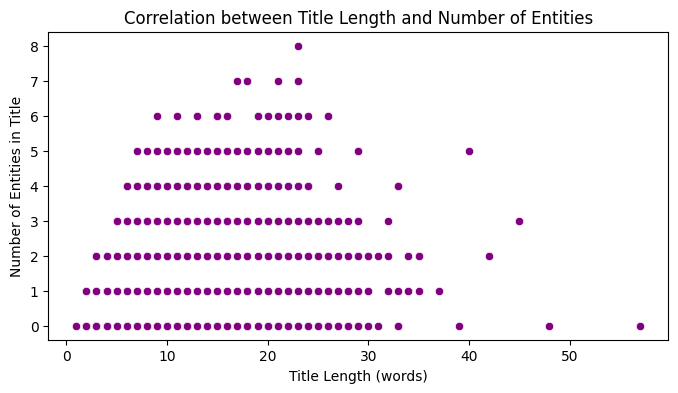

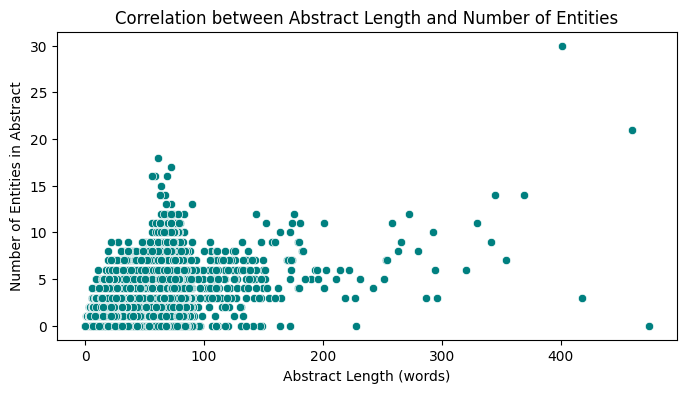

In [7]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='title_length', y='title_entity_count', data=news, color="purple")
plt.title("Correlation between Title Length and Number of Entities")
plt.xlabel("Title Length (words)")
plt.ylabel("Number of Entities in Title")
plt.show()

plt.figure(figsize=(8, 4))
sns.scatterplot(x='abstract_length', y='abstract_entity_count', data=news, color="teal")
plt.title("Correlation between Abstract Length and Number of Entities")
plt.xlabel("Abstract Length (words)")
plt.ylabel("Number of Entities in Abstract")
plt.show()

<ipython-input-8-44769bccfe48>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcat_counts.index, y=subcat_counts.values, palette="viridis")


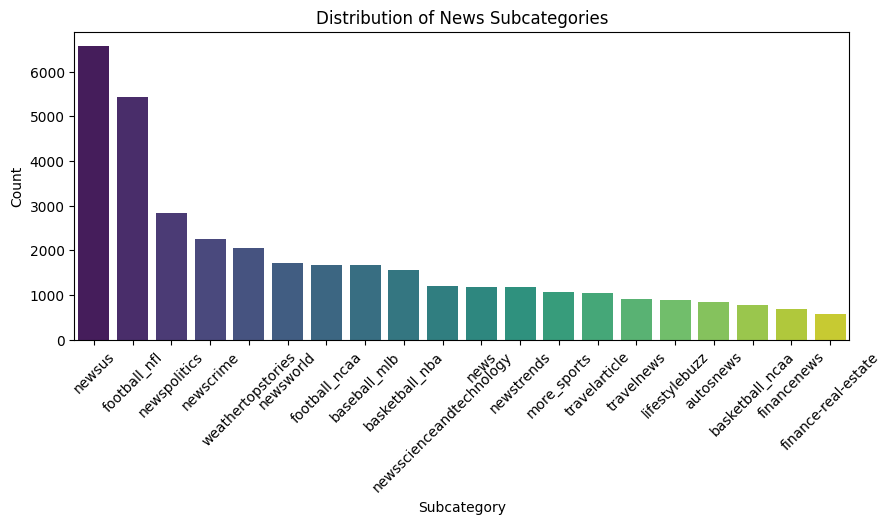

In [8]:
subcat_counts = news['subcategory'].value_counts().sort_values(ascending=False)[:20]
plt.figure(figsize=(10, 4))
sns.barplot(x=subcat_counts.index, y=subcat_counts.values, palette="viridis")
plt.title("Distribution of News Subcategories")
plt.xlabel("Subcategory")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [9]:
Here are several specific questions you can answer to document your findings from the exploratory analysis of the MIND news dataset:

Data Completeness & Structure:
------------------------------

What are the actual column names in the dataset, and how do they compare with the expected schema?
How many missing values are present in key columns (e.g., news_id, category, title, abstract, title_entities, abstract_entities)?
Are there any anomalies (e.g., unexpected data types) in these columns?

Content Characteristics:
------------------------

What is the distribution of news categories and subcategories?
How many unique categories and subcategories are there, and which ones are the most/least frequent?
What are the statistics (mean, median, range) of word counts in news titles and abstracts?
What are the dominant words or themes in titles and abstracts (e.g., as shown by word clouds)?

Entity Analysis:
----------------

How many entities are typically extracted from the titles and abstracts?
Is there a correlation between the length of a title/abstract and the number of entities found?
What types of entities (by their labels or types) appear most frequently in the dataset?

Temporal Patterns:
------------------

If publication or impression times are available, what does the temporal distribution look like?
Are there peak periods or trends in news publication or user engagement?

User Behavior:
--------------

What is the distribution of the number of news items in user click histories?
How many impressions does each log typically contain, and what does that say about user engagement?
Are there any notable patterns in how users interact with news over time?

Preprocessing Insights:
-----------------------

Did you need to perform any significant data cleaning or transformation (e.g., parsing JSON-like entity columns)?
What challenges did you encounter during preprocessing, and how did you resolve them?


SyntaxError: invalid syntax (<ipython-input-9-ee150b9b22b1>, line 1)

In [12]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [10]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Load the pre-trained transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Extract embeddings for news titles in batch
print("Extracting embeddings for news titles...")
titles = news['title'].astype(str).tolist()  # ensure all entries are strings
title_embeddings = model.encode(titles, show_progress_bar=True, batch_size=64)
# Add to DataFrame as a list of numpy arrays
news['title_embedding'] = list(title_embeddings)

# Extract embeddings for news abstracts in batch
print("Extracting embeddings for news abstracts...")
abstracts = news['abstract'].astype(str).tolist()
abstract_embeddings = model.encode(abstracts, show_progress_bar=True, batch_size=64)
news['abstract_embedding'] = list(abstract_embeddings)

# Optional: Check shape of one embedding to confirm dimensions (should be 384 for all-MiniLM-L6-v2)
print("Shape of title embedding:", news['title_embedding'].iloc[0].shape)
print("Shape of abstract embedding:", news['abstract_embedding'].iloc[0].shape)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Extracting embeddings for news titles...


Batches:   0%|          | 0/802 [00:00<?, ?it/s]

Extracting embeddings for news abstracts...


Batches:   0%|          | 0/802 [00:00<?, ?it/s]

Shape of title embedding: (384,)
Shape of abstract embedding: (384,)


In [11]:
# For example, using movie titles (if you wish to get an embedding for each movie title)
movie_titles = movies['Title'].astype(str).tolist()
movie_title_embeddings = model.encode(movie_titles, show_progress_bar=True, batch_size=64)
movies['title_embedding'] = list(movie_title_embeddings)
print("Shape of a movie title embedding:", movies['title_embedding'].iloc[0].shape)

Batches:   0%|          | 0/61 [00:00<?, ?it/s]

Shape of a movie title embedding: (384,)
